### Linear fit

$$
f(x)=2x+1
$$

Ecco i parametri che definiscono la retta:

In [123]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Ecco i parametri che possiamo variare per migliorare il funzionamento della rete:

In [124]:
n_train = 1000
sigma = 0.8 # noise standard deviation
n_epochs = 30

Generiamo i punti nel piano cartesiano che costituiranno il **training set** e il **validation set**.

In [125]:
import numpy as np

n_valid = int(n_train/10)   # tipically the majority of the data is partitioned into the training set.

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

Grafici del training set e del validation set rispetto alla retta che stiamo considerando.

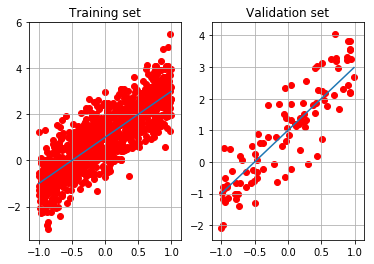

In [126]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(1,2)

axarr[0].plot(x_valid, y_target)
axarr[0].scatter(x_train, y_train, color='r')
axarr[0].grid(True); 
axarr[0].set_title('Training set')

axarr[1].plot(x_valid, y_target)
axarr[1].scatter(x_valid, y_valid, color='r')
axarr[1].grid(True); 
axarr[1].set_title('Validation set')

plt.show()

Creiamo una rete molto semplice con un hidden layer composto da un solo neurone. Nel caso seguente non viene utilizzata alcuna attivazione. 

In [127]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [128]:
# get a summary of our composed model
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Alleniamo la rete fornendole x_train e y_train. Utilizzando lo Stocastic Gradient Descent la rete troverà i pesi che minimizzano la loss function (MSE).

In [129]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/30
1000/1000 [==============================] - 0s 143us/sample - loss: 2.3102 - mean_squared_error: 2.3102 - val_loss: 1.9946 - val_mean_squared_error: 1.9946
Epoch 2/30
1000/1000 [==============================] - 0s 30us/sample - loss: 1.5001 - mean_squared_error: 1.5001 - val_loss: 1.4260 - val_mean_squared_error: 1.4260
Epoch 3/30
1000/1000 [==============================] - 0s 29us/sample - loss: 1.1319 - mean_squared_error: 1.1319 - val_loss: 1.1203 - val_mean_squared_error: 1.1203
Epoch 4/30
1000/1000 [==============================] - 0s 34us/sample - loss: 0.9359 - mean_squared_error: 0.9359 - val_loss: 0.9279 - val_mean_squared_error: 0.9279
Epoch 5/30
1000/1000 [==============================] - 0s 29us/sample - loss: 0.8162 - mean_squared_error: 0.8162 - val_loss: 0.8054 - val_mean_squared_error: 0.8054
Epoch 6/30
1000/1000 [==============================] - 0s 27us/sample - loss: 0.7432 - mean_squared_error: 0.7432 - 

In [130]:
model.get_weights()

[array([[2.0008667]], dtype=float32), array([1.0151917], dtype=float32)]

In [131]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 0s 29us/sample - loss: 0.5260 - mean_squared_error: 0.5260

Test loss: 0.5259963607788086
Test accuracy: 0.5259964


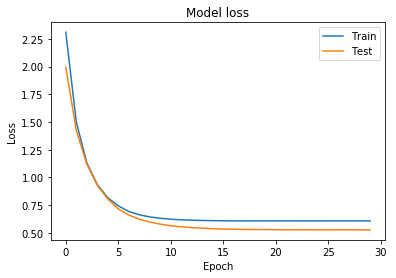

In [132]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

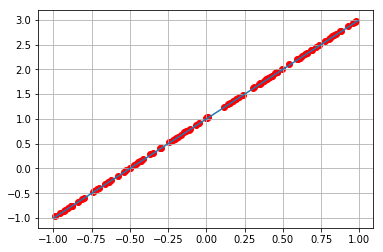

In [133]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Variando i parametri n_train, n_epochs e sigma è evidente come **il parametro determinante per la convergenza della regressione sia <b><font color='red'>n_train</font></b>**. Il rumore può essere anche molto alto ma se il train set è sufficientemente grande la rete riconosce la retta corretta. Al contrario se il train set è poco numeroso possiamo utilizzare un elevato numero di epoche e un rumore bassissimo, senza raggiungere comunque la convergenza.